DSC550 Week 4 <br>
Exercise 4.2 <br>
Predicting Fuel Efficiency <br>
Author Michael Paris <br>
12/28/2021 <br>

- Load the data as a Pandas data frame and ensure that it imported correctly.
- Begin by prepping the data for modeling:
- Remove the car name column.
- The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
- Create dummy variables for the origin column.
- Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
- Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.
- Randomly split the data into 80% training data and 20% test data, where your target is mpg.
- Train an ordinary linear regression on the training data.
- Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.
- Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [2]:
#lets import the dataset.

auto_mpg_df = pd.read_csv('auto-mpg.csv')
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# look for blank entries or blank rows
# look for duplicate entries

print(auto_mpg_df.shape)
pd.isna(auto_mpg_df)

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [4]:
# - Remove the car name column.

auto_mpg_df.drop('car name', axis=1, inplace=True)
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
# The horsepower column values likely imported as a string data type.
# Figure out why and replace any strings with the column mean.

print(auto_mpg_df.dtypes)
pd.isnull(auto_mpg_df['horsepower'])

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [6]:
auto_mpg_df.applymap(np.isreal)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,True,True,True,False,True,True,True,True
1,True,True,True,False,True,True,True,True
2,True,True,True,False,True,True,True,True
3,True,True,True,False,True,True,True,True
4,True,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...
393,True,True,True,False,True,True,True,True
394,True,True,True,False,True,True,True,True
395,True,True,True,False,True,True,True,True
396,True,True,True,False,True,True,True,True


In [7]:
#change the column to numeric and coerce any errors to null in prep to update them to the mean of the column
auto_mpg_df['horsepower'] = pd.to_numeric(auto_mpg_df['horsepower'], errors='coerce')

In [8]:
print(auto_mpg_df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


In [9]:
auto_mpg_df['horsepower'].isnull().values.any()

True

In [10]:
horsepower_mean = auto_mpg_df['horsepower'].mean()
print(horsepower_mean)
auto_mpg_df['horsepower'].fillna(horsepower_mean, inplace = True)

104.46938775510205


In [11]:
auto_mpg_df['horsepower'].isnull().values.any()

False

In [12]:
# Create dummy variables for the origin column.
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [13]:
#how many unique values are in the origin column?
auto_mpg_df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [14]:
# create additional columns for the values 1,2,3.  

auto_mpg_df['origin_1'] = auto_mpg_df['origin'].apply(lambda x: 1 if x == 1 else 0)
auto_mpg_df['origin_2'] = auto_mpg_df['origin'].apply(lambda x: 1 if x == 2 else 0)
auto_mpg_df['origin_3'] = auto_mpg_df['origin'].apply(lambda x: 1 if x == 3 else 0)

In [15]:
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,0,0


In [16]:
#Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
auto_mpg_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409,0.651407,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669,0.486083,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662,-0.139883,-0.024489,0.193101
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000,-0.924486,0.246332,0.886596
origin_1,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,-0.924486,1.000000,-0.597198,-0.643317
origin_2,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,0.246332,-0.597198,1.000000,-0.229895


#### From the above correlation matrix, we can see that there are several features that are highly correlated with mpg.
#### All of these strongly correlated features have a negative linear relationship with mpg.  As they increase, mpg decreases
#### Cylinders, Displacement, horsepower and weight are all highly correlated with mpg.



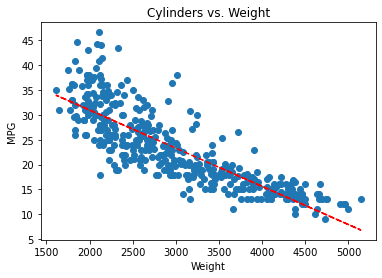

In [17]:
#Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.
# not that this one needs one, but lets add a trend line

plt.title("Cylinders vs. Weight")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.scatter(auto_mpg_df['weight'], auto_mpg_df['mpg'])

z = np.polyfit(auto_mpg_df['weight'], auto_mpg_df['mpg'], 1)
p = np.poly1d(z)
plt.plot(auto_mpg_df['weight'],p(auto_mpg_df['weight']),"r--")

plt.show()                                            
                                            
                                            
#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")


### As mentioned above, the graph shows how weight has a strong negative correlation with mpg.  As the weight increases, mpg decreases.

In [18]:
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,0,0


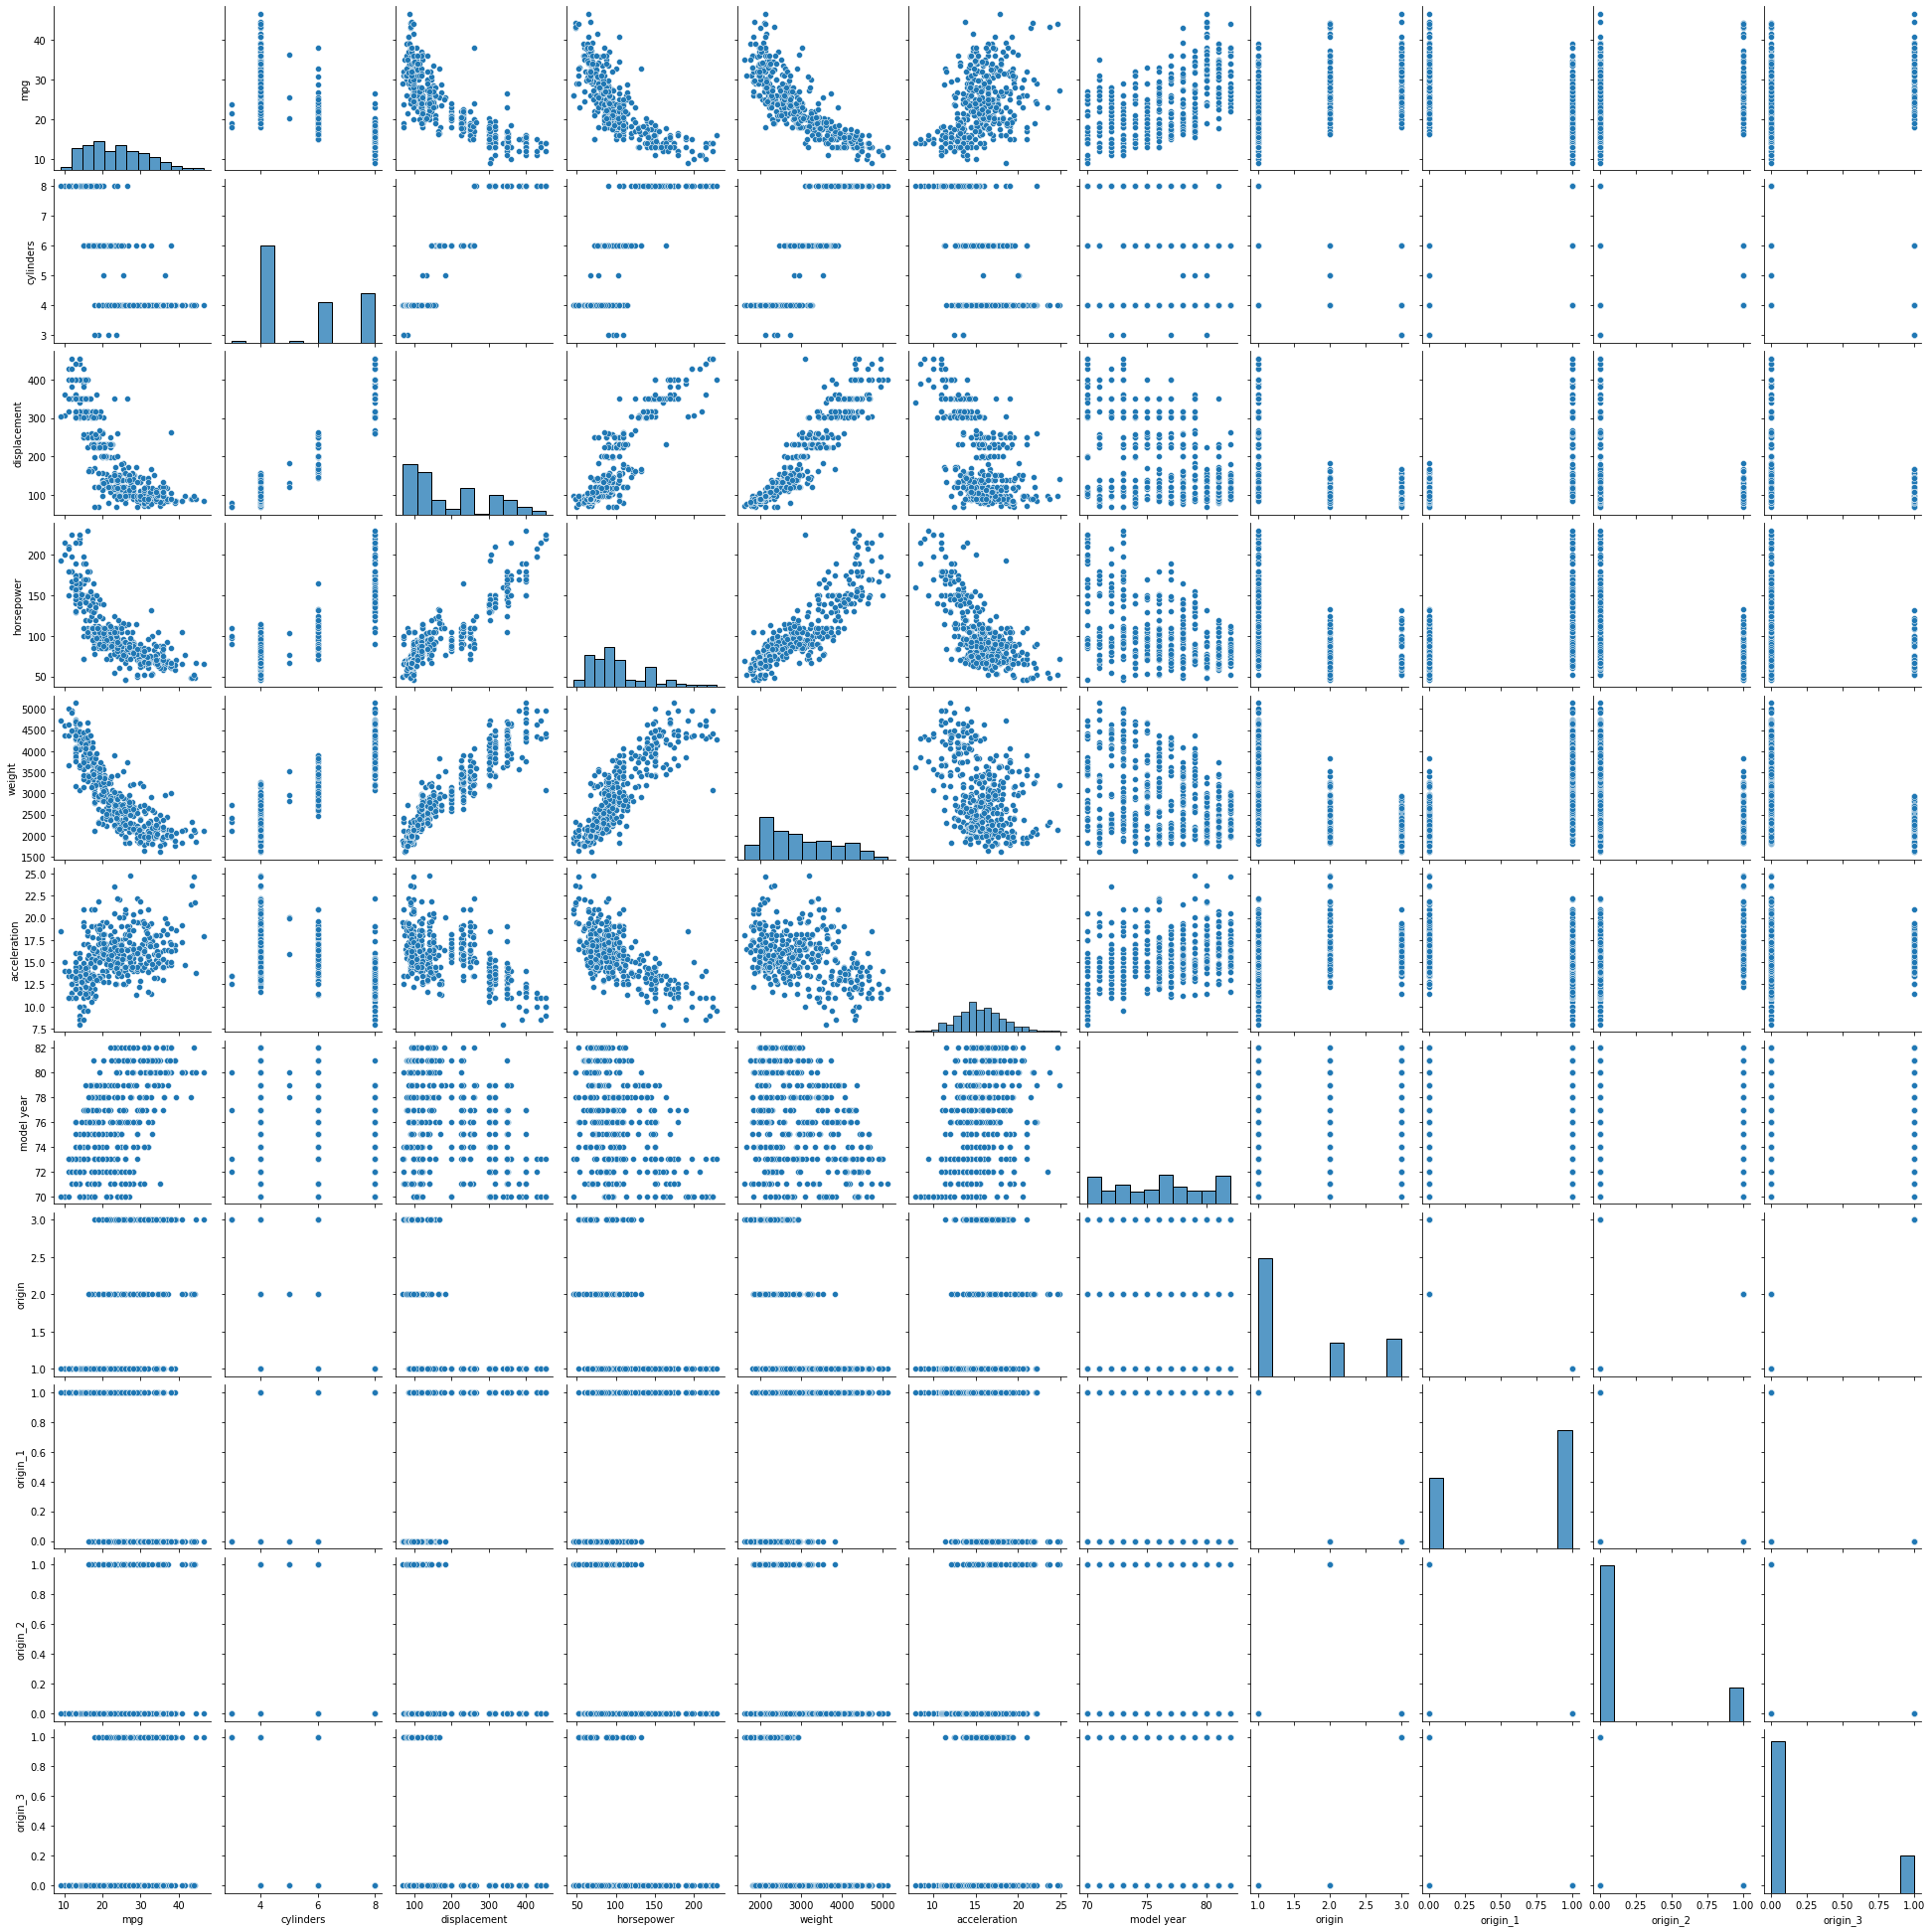

In [19]:
#see how easy it is to view all the distributions with sns
# since this plots them all, be careful if you're running this with a ton of data!

sns.pairplot(auto_mpg_df)

In [20]:
# Randomly split the data into 80% training data and 20% test data, where your target is mpg.
# put the features and target into a variable (following the book's example)
# I see others have just used the dataframe which might be a little cleaner depending on how you like to name stuff

#X
X = auto_mpg_df[['cylinders','displacement','horsepower','weight','acceleration','model year','origin','origin_1','origin_2','origin_3']]
#Y
y = auto_mpg_df[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print('Training count: {}'.format(X_train.shape[0]))
print('Testing count: {}'.format(X_test.shape[0]))

Training count: 318
Testing count: 80


In [21]:
#Train an ordinary linear regression on the training data.

regression = LinearRegression()
model = regression.fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)

lin_prediction_test = model.predict(X_test)

[-20.0933698]
[[-0.60301301  0.03146335 -0.00468832 -0.00774663  0.19039151  0.79399745
   0.92536952 -0.9874685   1.04956748 -0.06209898]]


In [22]:
#Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

print('R2 Score against the test set is: ', r2_score(y_test, lin_prediction_test))
print('MSE Score against the test set is: ', mean_squared_error(y_test, lin_prediction_test))
print('MAE Score against the test set is: ', mean_absolute_error(y_test, lin_prediction_test))

R2 Score against the test set is:  0.875695167343598
MSE Score against the test set is:  6.436658839084112
MAE Score against the test set is:  1.9714161326442692


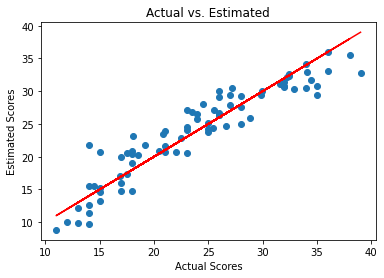

In [23]:
plt.scatter(y_test, lin_prediction_test)
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs. Estimated')
plt.xlabel('Actual Scores')
plt.ylabel('Estimated Scores')
plt.show()

In [24]:
#Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

lin_prediction_train = model.predict(X_train)

print('R2 Score against the train set is: ', r2_score(y_train, lin_prediction_train))
print('MSE Score against the train set is: ', mean_squared_error(y_train, lin_prediction_train))
print('MAE Score against the train set is: ', mean_absolute_error(y_train, lin_prediction_train))

R2 Score against the train set is:  0.8125231460075191
MSE Score against the train set is:  11.848117294176259
MAE Score against the train set is:  2.6708864552361624


In [25]:
#Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.
#review what this is doing
# Please Ignore for now

# training_MSE = cross_val_score(regression, features_train, target_train, scoring='neg_mean_squared_error')
# training_r2 = cross_val_score(regression, features_train, target_train, scoring='r2')
# training_MAE = cross_val_score(regression, features_train, target_train, scoring='neg_mean_absolute_error')

# print('R2 Score for the Training set is: ', training_r2)
# print('MSE for Training set is: ', training_MSE)
# print('MAE for Training set is: ', training_MAE)


# test_MSE = cross_val_score(regression, features_test, target_test, scoring='neg_mean_squared_error')
# test_r2 = cross_val_score(regression, features_test, target_test, scoring='r2')
# test_MAE = cross_val_score(regression, features_test, target_test, scoring='neg_mean_absolute_error')

# print('R2 Score for the Test set is: ', test_r2)
# print('MSE for Test set is: ', test_MSE)
# print('MAE for Test set is: ', test_MAE)


In [26]:
# Pick another regression model and repeat the previous two steps. 
# Note: Do NOT choose logistic regression as it is more like a classification model.

classifier = Ridge()
ridge_model = classifier.fit(X_train, y_train)

ridge_prediction_test = ridge_model.predict(X_test)

In [27]:
#Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

print('R2 Score against the test set is: ', r2_score(y_test, ridge_prediction_test))
print('MSE Score against the test set is: ', mean_squared_error(y_test, ridge_prediction_test))
print('MAE Score against the test set is: ', mean_absolute_error(y_test, ridge_prediction_test))

R2 Score against the test set is:  0.8758977565184731
MSE Score against the test set is:  6.4261685196387885
MAE Score against the test set is:  1.9701302088534889


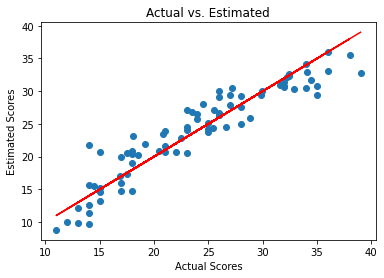

In [28]:
plt.scatter(y_test, ridge_prediction_test)
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs. Estimated')
plt.xlabel('Actual Scores')
plt.ylabel('Estimated Scores')
plt.show()

In [29]:
# lets try decisiontree regressor

decisiontree = DecisionTreeRegressor(random_state=0)
decision_tree_model = decisiontree.fit(X_train, y_train)

d_tree_prediction_test = decision_tree_model.predict(X_test)

In [30]:
#Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

print('R2 Score against the test set is: ', r2_score(y_test, d_tree_prediction_test))
print('MSE Score against the test set is: ', mean_squared_error(y_test, d_tree_prediction_test))
print('MAE Score against the test set is: ', mean_absolute_error(y_test, d_tree_prediction_test))

R2 Score against the test set is:  0.8329559243157423
MSE Score against the test set is:  8.649750000000001
MAE Score against the test set is:  2.2299999999999995


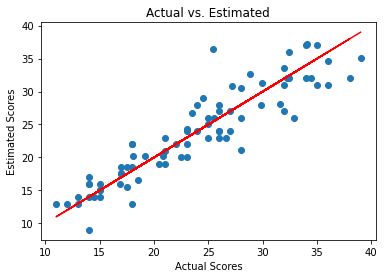

In [31]:
plt.scatter(y_test, d_tree_prediction_test)
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs. Estimated')
plt.xlabel('Actual Scores')
plt.ylabel('Estimated Scores')
plt.show()